In [1]:
##import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#read and store data in dataframe
data=pd.read_csv('matches.csv')

In [3]:
##save data in df and read top 5 rows o fthe data to see how the data looks
df=data
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
## check number of rows and columns in dataset
df.shape

(756, 18)

In [5]:
#to eyeball all the features
df.describe(include='all')

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,756.000000,756,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756,754,754,119
unique,NaN,12,32,546,15,15,15,2,3,NaN,15,NaN,NaN,226,41,61,65,25
top,NaN,IPL-2013,Mumbai,17-04-2011,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,S Ravi,C Shamshuddin
freq,NaN,76,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77,73,57,10
mean,1792.178571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN,NaN
std,3464.478148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,189.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,378.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,567.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


In [6]:
## to eyeball only numeric features
df.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


In [7]:
##id column is not that important for us and dl applied should be a categorical feature

In [8]:
df=df.drop(['id'],axis=1)

In [9]:
df['dl_applied']=df['dl_applied'].astype('str')

In [10]:
df.head()

,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [11]:
df.describe()

,win_by_runs,win_by_wickets
count,756.000000,756.000000
mean,13.283069,3.350529
std,23.471144,3.387963
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,4.000000
75%,19.000000,6.000000
max,146.000000,10.000000


In [12]:

df.columns

Index(['Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [13]:
# to know the frequency of men of matches awards
df['player_of_match'].value_counts()

CH Gayle          21
AB de Villiers    20
DA Warner         17
RG Sharma         17
MS Dhoni          17
                  ..
GJ Bailey          1
AD Mascarenhas     1
SA Asnodkar        1
Imran Tahir        1
S Aravind          1
Name: player_of_match, Length: 226, dtype: int64

In [14]:
# to know the top 10 players with most number of man of matches awards
df['player_of_match'].value_counts()[0:10]

CH Gayle          21
AB de Villiers    20
DA Warner         17
RG Sharma         17
MS Dhoni          17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
Name: player_of_match, dtype: int64

In [15]:
## to plot bar chart of above observation
players=list(df['player_of_match'].value_counts()[0:10].keys())

In [16]:
players

['CH Gayle',
 'AB de Villiers',
 'DA Warner',
 'RG Sharma',
 'MS Dhoni',
 'YK Pathan',
 'SR Watson',
 'SK Raina',
 'G Gambhir',
 'V Kohli']

In [17]:
awards=list(df['player_of_match'].value_counts()[0:10])

In [18]:
awards

[21, 20, 17, 17, 17, 16, 15, 14, 13, 12]

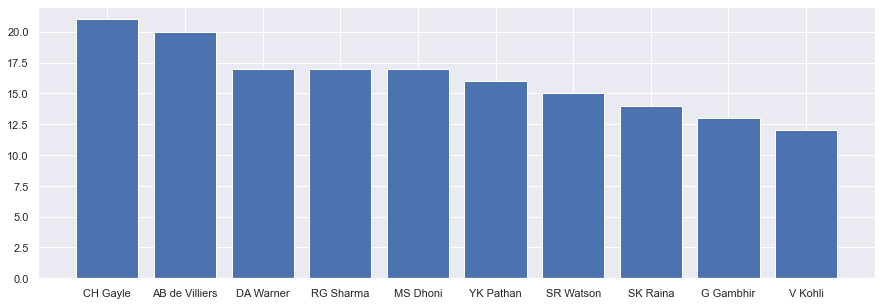

In [19]:
plt.figure(figsize=(15,5))
plt.bar(players,awards)
plt.show()

In [20]:
df.columns

Index(['Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [21]:
## to see how the result went for all the matches with counts
df['result'].value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [22]:
## to see which teams won most numbers of tosses
df['toss_winner'].value_counts()

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Royal Challengers Bangalore    81
Kings XI Punjab                81
Delhi Daredevils               80
Rajasthan Royals               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [23]:
## too see the deatils of team winning by runs and that batted first
batting_first=df[df['win_by_runs']!=0]

In [24]:
batting_first.head()

,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,IPL-2017,Pune,11-04-2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,IPL-2017,Kolkata,15-04-2017,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,IPL-2017,Delhi,15-04-2017,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN


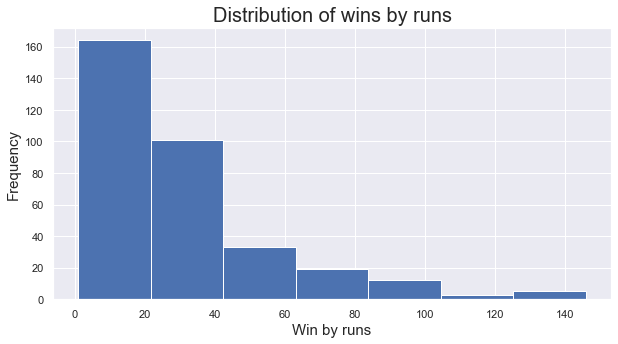

In [25]:
## to plot histogram of above observation
plt.figure(figsize=(10,5))
plt.hist(batting_first['win_by_runs'],bins=7)
plt.title('Distribution of wins by runs',size=20)
plt.xlabel('Win by runs',size=15)
plt.ylabel('Frequency',size=15)
plt.show()

In [26]:
batting_first.head()

,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
8,IPL-2017,Pune,11-04-2017,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
13,IPL-2017,Kolkata,15-04-2017,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
14,IPL-2017,Delhi,15-04-2017,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN


In [27]:
## we can check the teams with their corresponding win counts while batting first
batting_first['winner'].value_counts()

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Pune Warriors                   6
Rising Pune Supergiant          5
Delhi Capitals                  3
Rising Pune Supergiants         2
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

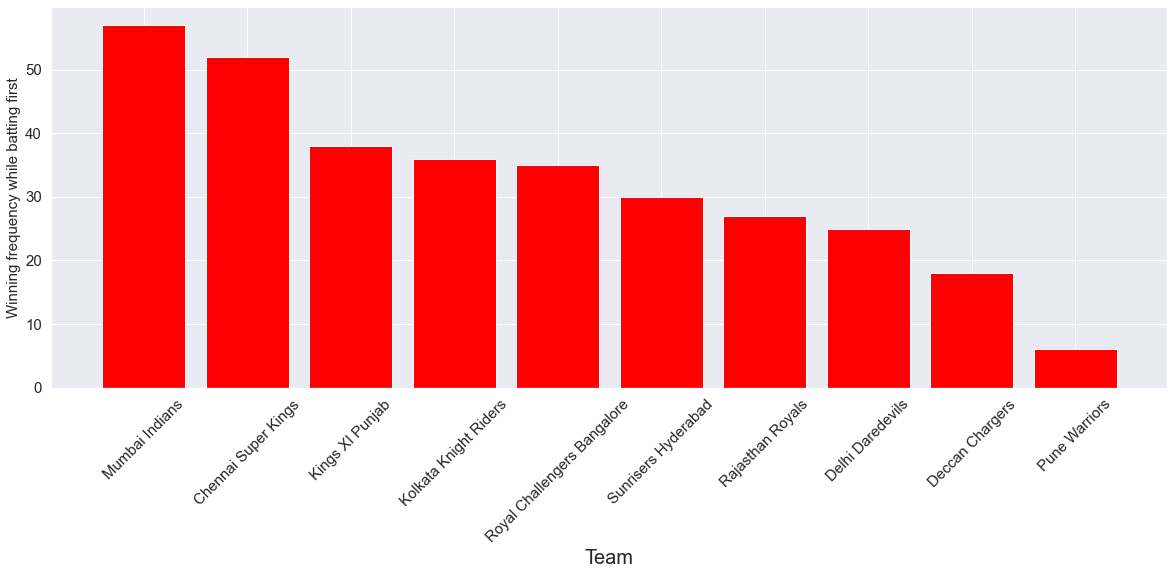

In [28]:
## to plot this

plt.figure(figsize=(20,7))
plt.bar(list(batting_first['winner'].value_counts()[0:10].keys()),list(batting_first['winner'].value_counts()[0:10]),color='red')
plt.xticks(rotation=45,size=15)
plt.yticks(size=15)
plt.xlabel('Team',size=20)
plt.ylabel('Winning frequency while batting first',size=15)
plt.show()

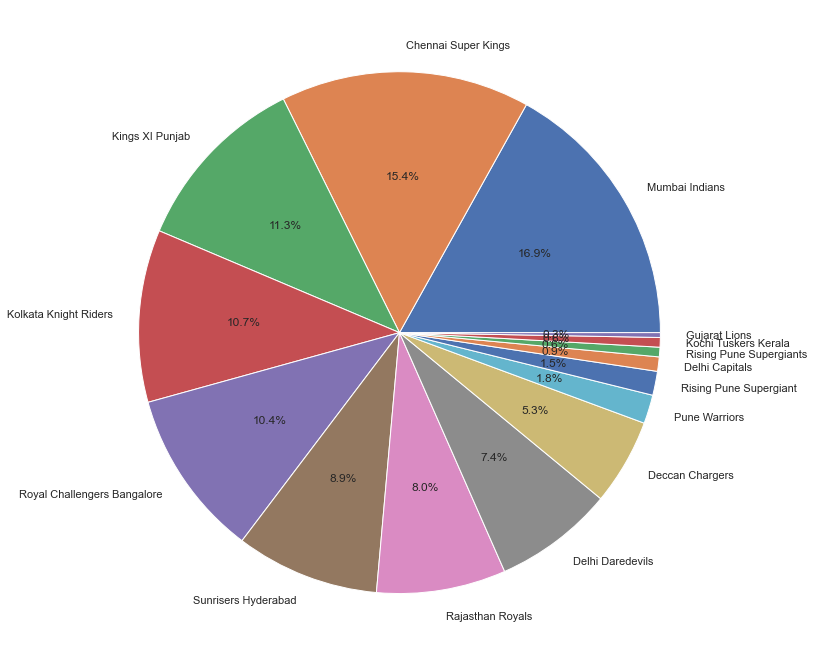

In [29]:
plt.figure(figsize=(12,12))
plt.pie(list(batting_first['winner'].value_counts()),labels=list(batting_first['winner'].value_counts().keys()),autopct='%0.1f%%')

plt.show()

In [30]:
df.columns

Index(['Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [31]:
## now we will analyze teams that won with wickets means the teams that chased the scores
batted_last=df[df['win_by_wickets']!=0]
batted_last.head()

,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
1,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,IPL-2017,Hyderabad,09-04-2017,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


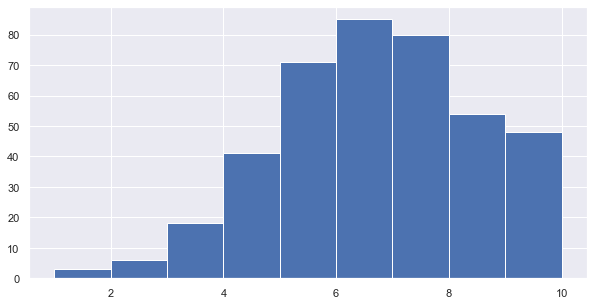

In [32]:
## plot histogram to see the distribution
plt.figure(figsize=(10,5))
plt.hist(batted_last['win_by_wickets'],bins=9)
plt.show()

In [33]:
## to see the teams and number of wins while batting later is
batted_last['winner'].value_counts()

Kolkata Knight Riders          56
Mumbai Indians                 50
Royal Challengers Bangalore    48
Chennai Super Kings            48
Rajasthan Royals               46
Kings XI Punjab                42
Delhi Daredevils               42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Pune Warriors                   6
Delhi Capitals                  6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

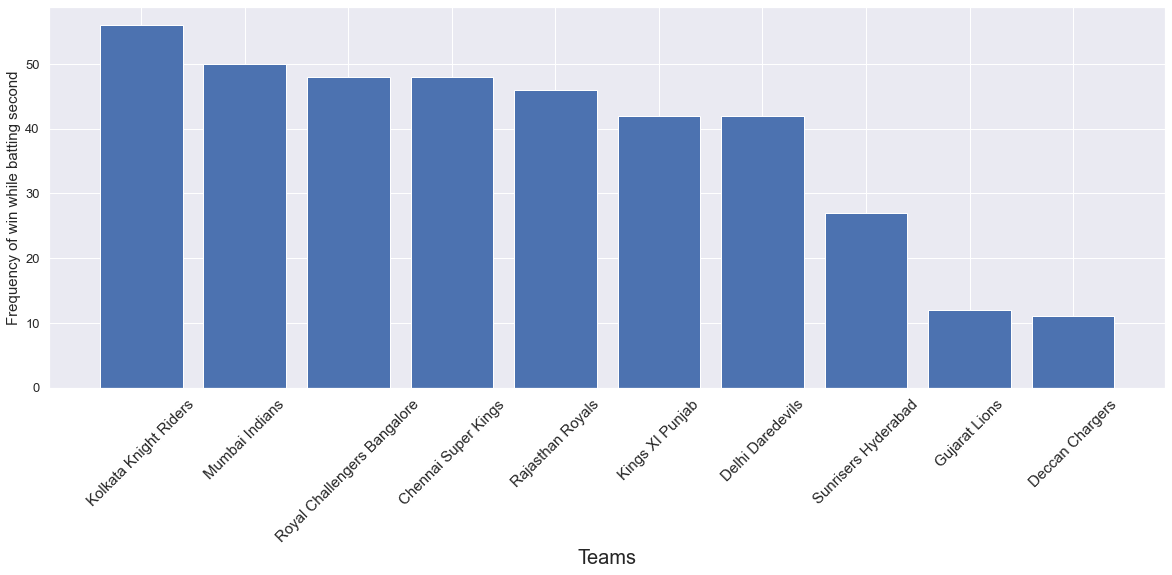

In [34]:
## to make a bar chart for the same
plt.figure(figsize=(20,7))
plt.bar(list(batted_last['winner'].value_counts()[0:10].keys()),list(batted_last['winner'].value_counts()[0:10]))
plt.xticks(rotation=45,size=15)
plt.yticks(size=13)
plt.xlabel('Teams',size=20)
plt.ylabel('Frequency of win while batting second',size=15)
plt.show()

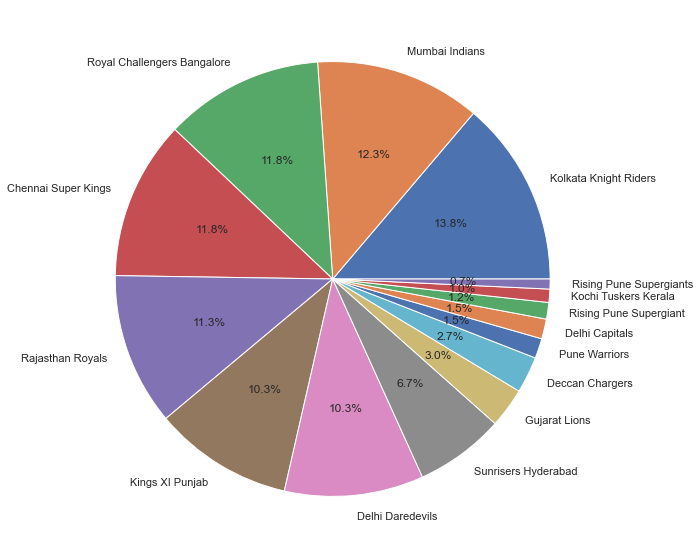

In [35]:
## to plot a pie chart for the same
plt.figure(figsize=(10,10))
plt.pie(list(batted_last['winner'].value_counts()),labels=list(batted_last['winner'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

In [36]:
df.columns

Index(['Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [37]:
## to analyze matches per season
df['Season'].value_counts()

IPL-2013    76
IPL-2012    74
IPL-2011    73
IPL-2019    60
IPL-2018    60
IPL-2010    60
IPL-2016    60
IPL-2014    60
IPL-2017    59
IPL-2015    59
IPL-2008    58
IPL-2009    57
Name: Season, dtype: int64

In [38]:
# to analyze matches per city
df['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          66
Hyderabad          64
Chennai            57
Jaipur             47
Chandigarh         46
Pune               38
Durban             15
Bengaluru          14
Visakhapatnam      13
Centurion          12
Ahmedabad          12
Rajkot             10
Mohali             10
Indore              9
Dharamsala          9
Johannesburg        8
Cape Town           7
Cuttack             7
Abu Dhabi           7
Port Elizabeth      7
Ranchi              7
Raipur              6
Sharjah             6
Kochi               5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

In [39]:
df.columns

Index(['Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [40]:
## to see how many times the team that won the toss won the match too
np.sum(df['toss_winner']==df['winner'])

393

In [41]:
## to check the percentage
np.sum(df['toss_winner']==df['winner'])/df['toss_winner'].shape[0]

0.5198412698412699

In [42]:
## there is another dataset where we have details of batsmen
data2=pd.read_excel('Players.xlsx')

In [43]:
df2=data2
df2.head()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN


In [44]:
## to check number of rows and columns
df2.shape

(566, 5)

In [46]:
#3 to check the count of right handed and left handed batsman
df2['Batting_Hand'].value_counts()

Right_Hand    373
Left_Hand     142
Right_hand     48
Name: Batting_Hand, dtype: int64

In [55]:
## we see that due to capitalization issue right handed batsman are categorized in two categories that we can change

df2['Batting_Hand']=df2['Batting_Hand'].str.replace('hand','Hand')

In [56]:
# now we check the counts again
df2['Batting_Hand'].value_counts()

Right_Hand    421
Left_Hand     142
Name: Batting_Hand, dtype: int64

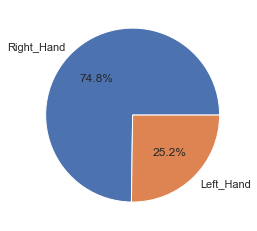

In [59]:
## we can create pie chart for the same
plt.pie(list(df2['Batting_Hand'].value_counts()),labels=list(df2['Batting_Hand'].value_counts().keys()),autopct='%0.1f%%')
plt.show()

In [60]:
## we see that nearly 3/4th of our players are right handed